In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_17_3.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation, :]
x_train = input_data[:100000,:]
x_valid = input_data[100000:102500, :]
x_test = input_data[102500:,:]



(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_17_3.pickle','rb') as file:
    output_data = pickle.load(file)
    
output_data = np.transpose(output_data)
output_data = output_data[permutation, :]
y_train = output_data[:100000,:]
y_valid = output_data[100000:102500, :]
y_test = output_data[102500:,:]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.0035)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_valid, y_valid))


Train on 100000 samples, validate on 2500 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.3347 - accuracy: 0.8526 - val_loss: 0.2387 - val_accuracy: 0.8878
Epoch 2/100
100000/100000 - 2s - loss: 0.2094 - accuracy: 0.9013 - val_loss: 0.1869 - val_accuracy: 0.9104
Epoch 3/100
100000/100000 - 1s - loss: 0.1802 - accuracy: 0.9130 - val_loss: 0.1674 - val_accuracy: 0.9183
Epoch 4/100
100000/100000 - 1s - loss: 0.1667 - accuracy: 0.9187 - val_loss: 0.1606 - val_accuracy: 0.9219
Epoch 5/100
100000/100000 - 2s - loss: 0.1584 - accuracy: 0.9229 - val_loss: 0.1547 - val_accuracy: 0.9244
Epoch 6/100
100000/100000 - 2s - loss: 0.1517 - accuracy: 0.9262 - val_loss: 0.1514 - val_accuracy: 0.9264
Epoch 7/100
100000/100000 - 2s - loss: 0.1495 - accuracy: 0.9273 - val_loss: 0.1473 - val_accuracy: 0.9284
Epoch 8/100
100000/100000 - 2s - loss: 0.1447 - accuracy: 0.9301 - val_loss: 0.1437 - val_accuracy: 0.9296
Epoch 9/100
100000/100000 - 1s - loss: 0.1487 - accuracy: 0.9292 - val_loss: 0.1463 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0204 - accuracy: 0.9919 - val_loss: 0.0348 - val_accuracy: 0.9882
Epoch 78/100
100000/100000 - 1s - loss: 0.0187 - accuracy: 0.9927 - val_loss: 0.0344 - val_accuracy: 0.9877
Epoch 79/100
100000/100000 - 1s - loss: 0.0172 - accuracy: 0.9931 - val_loss: 0.0358 - val_accuracy: 0.9869
Epoch 80/100
100000/100000 - 1s - loss: 0.0163 - accuracy: 0.9936 - val_loss: 0.0323 - val_accuracy: 0.9877
Epoch 81/100
100000/100000 - 2s - loss: 0.0163 - accuracy: 0.9935 - val_loss: 0.0333 - val_accuracy: 0.9874
Epoch 82/100
100000/100000 - 1s - loss: 0.0161 - accuracy: 0.9938 - val_loss: 0.0357 - val_accuracy: 0.9880
Epoch 83/100
100000/100000 - 1s - loss: 0.0151 - accuracy: 0.9940 - val_loss: 0.0389 - val_accuracy: 0.9871
Epoch 84/100
100000/100000 - 1s - loss: 0.0177 - accuracy: 0.9931 - val_loss: 0.0371 - val_accuracy: 0.9872
Epoch 85/100
100000/100000 - 1s - loss: 0.0185 - accuracy: 0.9929 - val_loss: 0.0414 - val_accuracy: 0.9865
Epoch 86/100
100000/100000 -

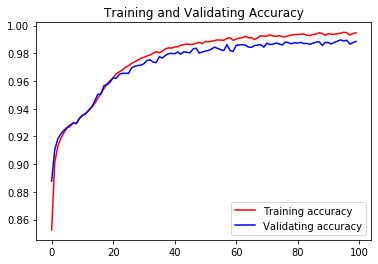

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()
plt.show()

In [8]:
predict = model.predict(x_test)

In [9]:
print(predict.shape)

(2500, 12)


In [7]:
model.evaluate(x_test, y_test, verbose = 2)

2500/1 - 0s - loss: 0.0157 - accuracy: 0.9900


[0.02902057208903134, 0.9900333]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_17_3_model.h5')